# Python数据可视化（八）：小提琴图绘制

## 使用seaborn包绘制小提琴图

In [1]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

In [2]:
# 加载示例数据集
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


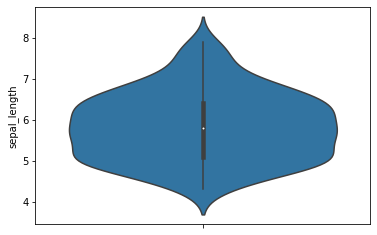

In [3]:
# 绘制基础小提琴图
# Make boxplot for one group only
sns.violinplot(y=df["sepal_length"])
plt.show()

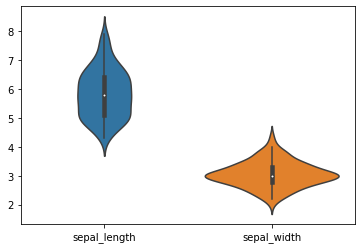

In [5]:
# 绘制多个变量的小提琴图
# plot
sns.violinplot(data=df.iloc[:,0:2])
plt.show()

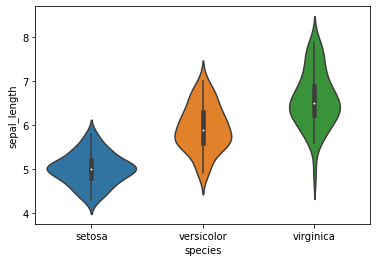

In [4]:
# 绘制分组小提琴图
# plot
sns.violinplot( x=df["species"], y=df["sepal_length"] )
plt.show()

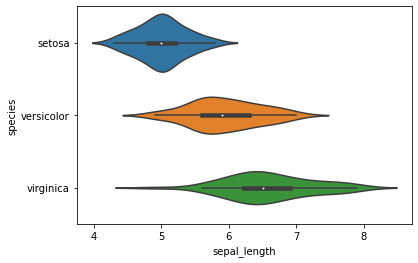

In [6]:
# 水平放置小提琴图
# Just switch x and y
sns.violinplot(y=df["species"], x=df["sepal_length"])
plt.show()

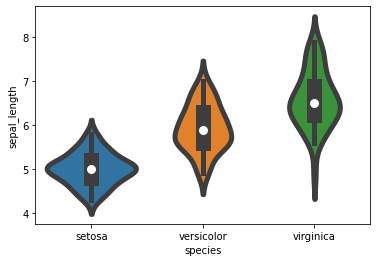

In [7]:
# 设置linewidth参数更改边框线的宽度
# Change line width
sns.violinplot(x=df["species"], y=df["sepal_length"], linewidth=5)
plt.show()

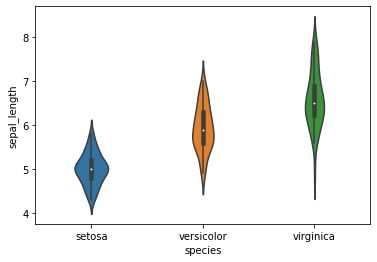

In [8]:
# 设置width参数更改小提琴的宽度
# Change width
sns.violinplot(x=df["species"], y=df["sepal_length"], width=0.3)
plt.show()

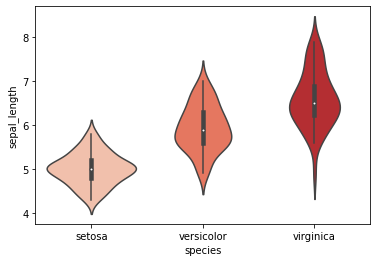

In [10]:
# 自定义小提琴的颜色
# Use a color palette
sns.violinplot(x=df["species"], y=df["sepal_length"], palette="Reds")
plt.show()

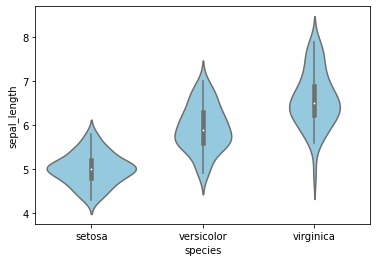

In [11]:
# plot
sns.violinplot(x=df["species"], y=df["sepal_length"], color="skyblue")
plt.show()

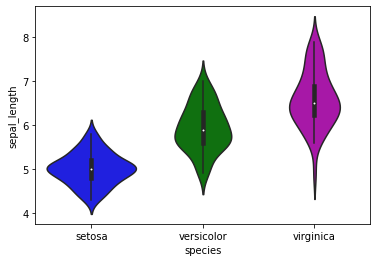

In [12]:
# creating a dictionary with one specific color per group:
my_pal = {"versicolor": "g", "setosa": "b", "virginica": "m"}
 
# plot it
sns.violinplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
plt.show()

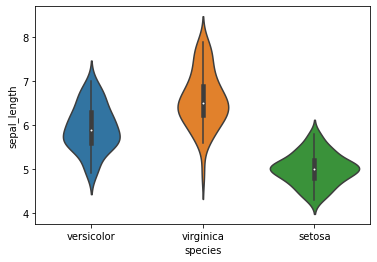

In [13]:
# 自定义分组的排序
# specifying the group list as 'order' parameter and plotting
sns.violinplot(x='species', y='sepal_length', data=df, order=[ "versicolor", "virginica", "setosa"])
plt.show()

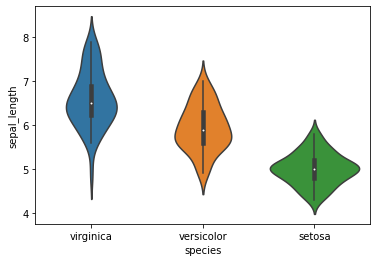

In [14]:
# Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=["species"])["sepal_length"].median().iloc[::-1].index
 
# Specifying the 'order' parameter with my_order and plotting
sns.violinplot(x='species', y='sepal_length', data=df, order=my_order)
plt.show()

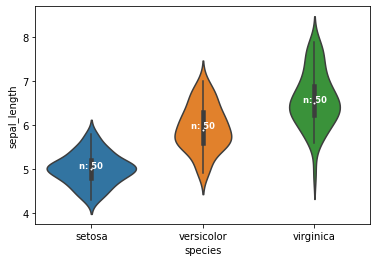

In [15]:
# 添加文本注释信息
# Basic violinplot stored in a matplotlib.axes object
ax = sns.violinplot(x="species", y="sepal_length", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='small',
            color='w',
            weight='semibold')
plt.show()

## 原文链接：https://www.python-graph-gallery.com/violin-plot/